In [1]:
# Empezamos con el EDA

In [2]:
from zipfile import ZipFile 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [3]:
file_name = "dataset_amazon.zip"

In [4]:
with ZipFile(file_name, 'r') as zip: 
    # printing all the contents of the zip file 
    zip.printdir() 
    # extracting all the files 
    print('Extracting all the files now...') 
    zip.extractall() 
    print('Done!') 

File Name                                             Modified             Size
dataset_es_dev.json                            2020-07-01 15:04:04      1930836
dataset_es_test.json                           2020-07-01 15:04:24      1939602
dataset_es_train.json                          2020-07-01 15:04:56     77475023
Extracting all the files now...
Done!


In [5]:
train = pd.read_json('dataset_es_train.json',lines=True)
dev = pd.read_json('dataset_es_dev.json',lines=True)
test = pd.read_json('dataset_es_test.json',lines=True)

In [6]:
train.head()

,review_id,product_id,reviewer_id,stars,review_body,review_title,language,product_category
0,es_0491108,product_es_0296024,reviewer_es_0999081,1,Nada bueno se me fue ka pantalla en menos de 8...,television Nevir,es,electronics
1,es_0869872,product_es_0922286,reviewer_es_0216771,1,"Horrible, nos tuvimos que comprar otro porque ...",Dinero tirado a la basura con esta compra,es,electronics
2,es_0811721,product_es_0474543,reviewer_es_0929213,1,Te obligan a comprar dos unidades y te llega s...,solo llega una unidad cuando te obligan a comp...,es,drugstore
3,es_0359921,product_es_0656090,reviewer_es_0224702,1,"No entro en descalificar al vendedor, solo pue...",PRODUCTO NO RECIBIDO.,es,wireless
4,es_0068940,product_es_0662544,reviewer_es_0224827,1,Llega tarde y co la talla equivocada,Devuelto,es,shoes


In [7]:
print('train shape:',train.shape)
print('test shape:',test.shape)
print('dev shape:',dev.shape)

train shape: (200000, 8)
test shape: (5000, 8)
dev shape: (5000, 8)


In [105]:
data = pd.concat([train,test,dev])

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 210000 entries, 0 to 4999
Data columns (total 8 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   review_id         210000 non-null  object
 1   product_id        210000 non-null  object
 2   reviewer_id       210000 non-null  object
 3   stars             210000 non-null  int64 
 4   review_body       210000 non-null  object
 5   review_title      210000 non-null  object
 6   language          210000 non-null  object
 7   product_category  210000 non-null  object
dtypes: int64(1), object(7)
memory usage: 14.4+ MB


<AxesSubplot:xlabel='stars', ylabel='count'>

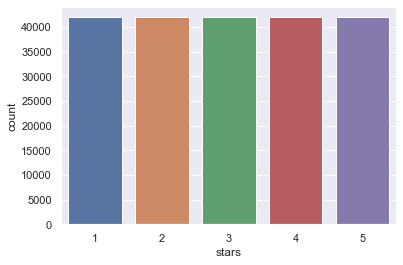

In [10]:
sns.countplot(data = data, x = 'stars')

In [10]:
# vemos que esta distribuido en partes iguales

In [11]:
data.language.value_counts()
# vemos que estan todos los reviews en español

es    210000
Name: language, dtype: int64

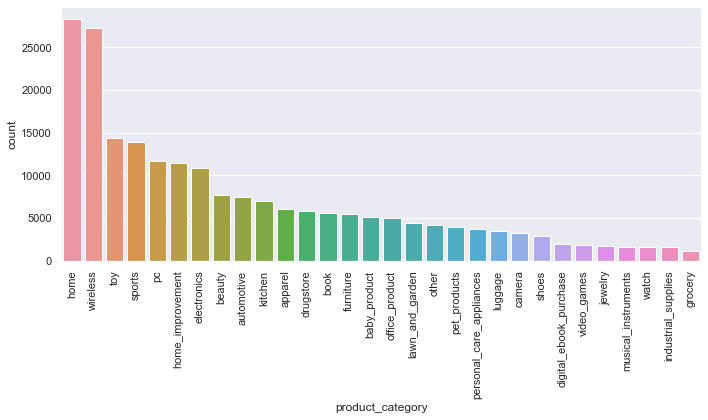

In [13]:
plt.figure(figsize=(10,6))
sns.countplot(x='product_category',data=data,order=data['product_category'].value_counts().index)
plt.xticks(rotation = 90)
plt.tight_layout()
plt.show()

In [14]:
data.reviewer_id.describe()

count                  210000
unique                 187140
top       reviewer_es_0437514
freq                        7
Name: reviewer_id, dtype: object

In [14]:
# vemos que hay id que se repiten

In [15]:
data.product_id.describe()

count                 210000
unique                156458
top       product_es_0261843
freq                       8
Name: product_id, dtype: object

In [16]:
# vemos que hay productos que se repiten

In [16]:
data['length'] = train.review_body.apply(len)

In [17]:
data.head()

,review_id,product_id,reviewer_id,stars,review_body,review_title,language,product_category,length
0,es_0491108,product_es_0296024,reviewer_es_0999081,1,Nada bueno se me fue ka pantalla en menos de 8...,television Nevir,es,electronics,94
1,es_0869872,product_es_0922286,reviewer_es_0216771,1,"Horrible, nos tuvimos que comprar otro porque ...",Dinero tirado a la basura con esta compra,es,electronics,140
2,es_0811721,product_es_0474543,reviewer_es_0929213,1,Te obligan a comprar dos unidades y te llega s...,solo llega una unidad cuando te obligan a comp...,es,drugstore,117
3,es_0359921,product_es_0656090,reviewer_es_0224702,1,"No entro en descalificar al vendedor, solo pue...",PRODUCTO NO RECIBIDO.,es,wireless,332
4,es_0068940,product_es_0662544,reviewer_es_0224827,1,Llega tarde y co la talla equivocada,Devuelto,es,shoes,36


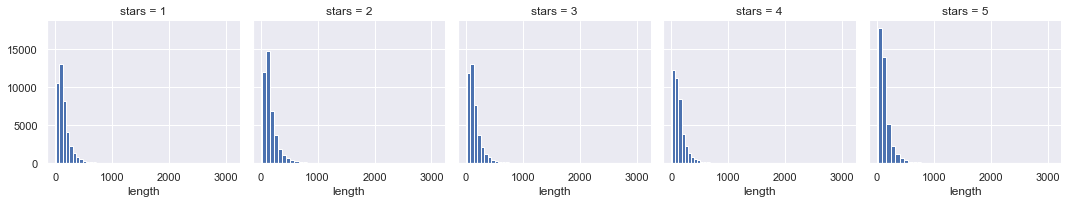

In [18]:
g = sns.FacetGrid(data,col='stars')
g.map(plt.hist,'length',bins=40)

<AxesSubplot:xlabel='stars', ylabel='length'>

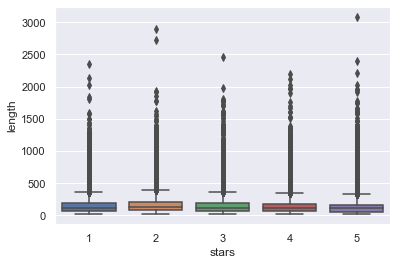

In [19]:
sns.boxplot(x='stars',y='length',data=data)

In [20]:
# faltar ver palabras mas comunes
# falta vocabulario

In [21]:
#limpieza de datos

In [106]:
import nltk
import string
import re

In [111]:
stopwords = nltk.corpus.stopwords.words('spanish')

In [112]:
def clean_text_round1(text):
    '''Make text lowercase, remove text in square brackets, remove punctuation and remove words containing numbers.'''
    text = text.lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\w*\d\w*', '', text)
    return text

round1 = lambda x: clean_text_round1(x)

In [113]:
data['review_limpio'] = data.review_body.apply(round1)
data['title_limpio'] = data.review_title.apply(round1)

In [125]:
print(data.review_body.iloc[0])
print(data.review_limpio.iloc[0])

Nada bueno se me fue ka pantalla en menos de 8 meses y no he recibido respuesta del fabricante
nada bueno se me fue ka pantalla en menos de  meses y no he recibido respuesta del fabricante


In [127]:
def clean_text_round2(text):
    '''Get rid of some additional punctuation and non-sensical text that was missed the first time around.'''
    text = re.sub('[‘’“”…]', '', text)
    text = re.sub('\n', '', text)
    text = nltk.word_tokenize(text)
    text = [palabra for palabra in text if len(palabra)>1]
    text = [palabra for palabra in text if not palabra in stopwords]
    return ' '.join(text)

round2 = lambda x: clean_text_round2(x)

In [128]:
data['review_limpio'] = data.review_limpio.apply(round2)
data['title_limpio'] = data.title_limpio.apply(round2)

In [129]:
data.head()

,review_id,product_id,reviewer_id,stars,review_body,review_title,language,product_category,review_limpio,title_limpio
0,es_0491108,product_es_0296024,reviewer_es_0999081,1,Nada bueno se me fue ka pantalla en menos de 8...,television Nevir,es,electronics,bueno ka pantalla menos meses recibido respues...,television nevir
1,es_0869872,product_es_0922286,reviewer_es_0216771,1,"Horrible, nos tuvimos que comprar otro porque ...",Dinero tirado a la basura con esta compra,es,electronics,horrible comprar sabemos inglés informático de...,dinero tirado basura compra
2,es_0811721,product_es_0474543,reviewer_es_0929213,1,Te obligan a comprar dos unidades y te llega s...,solo llega una unidad cuando te obligan a comp...,es,drugstore,obligan comprar dos unidades llega solo forma ...,solo llega unidad obligan comprar dos
3,es_0359921,product_es_0656090,reviewer_es_0224702,1,"No entro en descalificar al vendedor, solo pue...",PRODUCTO NO RECIBIDO.,es,wireless,entro descalificar vendedor solo puedo decir t...,producto recibido
4,es_0068940,product_es_0662544,reviewer_es_0224827,1,Llega tarde y co la talla equivocada,Devuelto,es,shoes,llega tarde co talla equivocada,devuelto


In [130]:
datos = data[(data.stars==1) | (data.stars==5)]

In [131]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 84000 entries, 0 to 4999
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   review_id         84000 non-null  object
 1   product_id        84000 non-null  object
 2   reviewer_id       84000 non-null  object
 3   stars             84000 non-null  int64 
 4   review_body       84000 non-null  object
 5   review_title      84000 non-null  object
 6   language          84000 non-null  object
 7   product_category  84000 non-null  object
 8   review_limpio     84000 non-null  object
 9   title_limpio      84000 non-null  object
dtypes: int64(1), object(9)
memory usage: 7.0+ MB


In [132]:
datos_5_stars = datos[datos.stars==5]
datos_1_stars = datos[datos.stars==1]

In [133]:
datos_5_stars.head()

,review_id,product_id,reviewer_id,stars,review_body,review_title,language,product_category,review_limpio,title_limpio
160000,es_0910973,product_es_0134206,reviewer_es_0167400,5,Es muy práctico para cuando me voy de vacacion...,Muy útil,es,lawn_and_garden,práctico voy vacaciones preocupar si seguirán ...,útil
160001,es_0188101,product_es_0588074,reviewer_es_0222694,5,Cumple su función calidad precio bien. Buen ma...,Luz Ultravioleta en led bien diseñada,es,home,cumple función calidad precio bien buen materi...,luz ultravioleta led bien diseñada
160002,es_0578692,product_es_0623782,reviewer_es_0300882,5,Perfecto.. Es lo que buscaba,Perfecto,es,wireless,perfecto buscaba,perfecto
160003,es_0795859,product_es_0754167,reviewer_es_0233707,5,"MUY BUENA RELACIÓN CALIDAD-PRECIO, ES SILENCIO...",MUY BUENA DESTRUCTORA,es,office_product,buena relación calidadprecio silenciosa cumple...,buena destructora
160004,es_0920314,product_es_0400256,reviewer_es_0383766,5,"a mi hija le encanta, aunque hubiera preferido...",muy bueno,es,toy,hija encanta aunque preferido plástico mas gom...,bueno


In [134]:
reviews_5_stars = []
for i in range(datos_5_stars.shape[0]):
    texto = datos_5_stars.iloc[i].review_limpio
    texto = nltk.tokenize.RegexpTokenizer("[\w]+").tokenize(texto)
    texto = [word for word in texto if word not in stopwords]
    texto = [palabra for palabra in texto if len(palabra)>3]
    reviews_5_stars.append(texto)

In [135]:
import itertools

In [136]:
reviews_5_stars = list(itertools.chain(*reviews_5_stars))
reviews_5_stars[0:10]

['práctico',
 'vacaciones',
 'preocupar',
 'seguirán',
 'vivas',
 'plantas',
 'vuelva',
 'montaje',
 'sencillo',
 'puede']

In [137]:
freq_5 = nltk.FreqDist(reviews_5_stars)
freq_5

FreqDist({'bien': 9647, 'calidad': 7886, 'buena': 7128, 'precio': 5375, 'perfecto': 4904, 'producto': 4597, 'buen': 4303, 'compra': 2934, 'perfectamente': 2869, 'recomiendo': 2720, ...})

In [138]:
df_5 = pd.DataFrame(list(freq_5.items()), columns = ["Word","Frequency"])
df_5.head()

,Word,Frequency
0,práctico,606
1,vacaciones,41
2,preocupar,3
3,seguirán,2
4,vivas,2


In [139]:
df_5.sort_values('Frequency',ascending=False, inplace = True)
df_5.head()

,Word,Frequency
23,bien,9647
21,calidad,7886
30,buena,7128
22,precio,5375
28,perfecto,4904


In [140]:
df_5.reset_index(drop = True, inplace=True)
df_5.head()

,Word,Frequency
0,bien,9647
1,calidad,7886
2,buena,7128
3,precio,5375
4,perfecto,4904


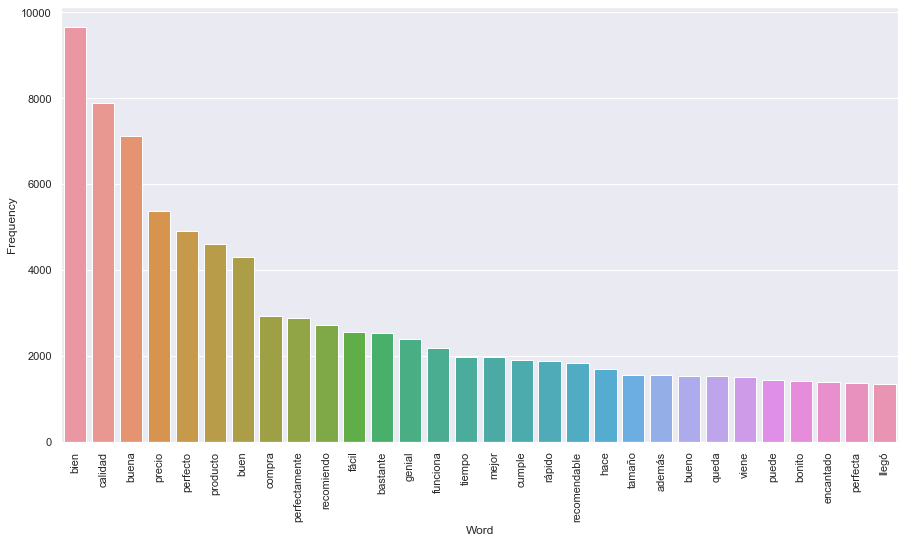

In [141]:
plt.figure(figsize = (15,8))
plot = sns.barplot(x  = df_5.iloc[:30].Word, y = df_5.iloc[:30].Frequency)
for item in plot.get_xticklabels():
    item.set_rotation(90)
plt.show()

In [142]:
#hacer lo mismo para 1 estrella

In [143]:
reviews_1_stars = []
for i in range(datos_1_stars.shape[0]):
    texto = datos_1_stars.iloc[i].review_limpio
    texto = nltk.tokenize.RegexpTokenizer("[\w]+").tokenize(texto)
    texto = [word for word in texto if word not in stopwords]
    texto = [palabra for palabra in texto if len(palabra)>3]
    reviews_1_stars.append(texto)

In [144]:
reviews_1_stars = list(itertools.chain(*reviews_1_stars))
freq_1 = nltk.FreqDist(reviews_1_stars)
df_1 = pd.DataFrame(list(freq_1.items()), columns = ["Word","Frequency"])
df_1.sort_values('Frequency',ascending=False, inplace = True)
df_1.reset_index(drop = True, inplace=True)
df_1.head()

,Word,Frequency
0,producto,7513
1,bien,4588
2,calidad,4404
3,llegado,3517
4,recomiendo,2941


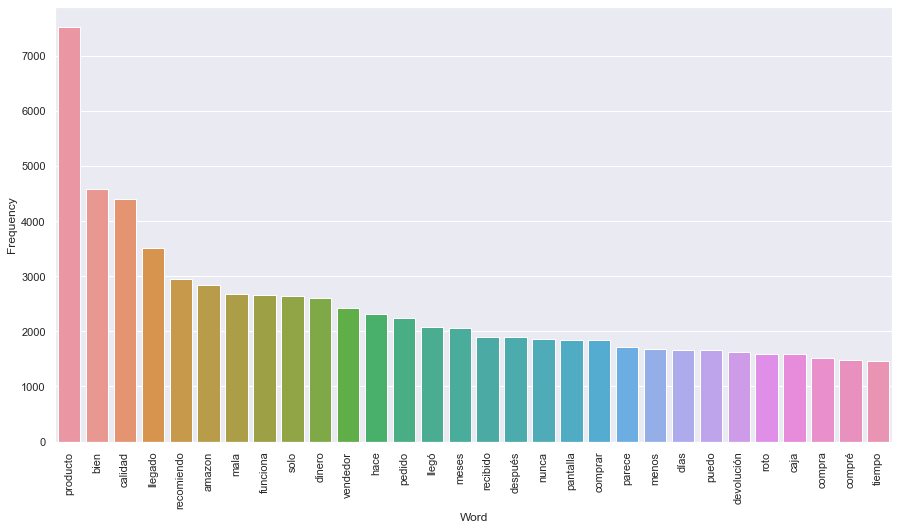

In [145]:
plt.figure(figsize = (15,8))
plot = sns.barplot(x  = df_1.iloc[:30].Word, y = df_1.iloc[:30].Frequency)
for item in plot.get_xticklabels():
    item.set_rotation(90)
plt.show()

In [146]:
# usamos el stemming

In [147]:
# Importamos la función que nos permite Stemmizar de nltk y definimos el stemmer
from nltk.stem import PorterStemmer
stemmer = PorterStemmer()


In [150]:
def stemming(texto):
    texto = [stemmer.stem(palabra) for palabra in texto]
    # Por ultimo volvemos a unir el titular
    texto=" ".join(texto)
    

In [151]:
datos['stem'] = datos.review_limpio.apply(stemming)
datos['title_stem'] = datos.title_limpio.apply(stemming)

<ipython-input-151-27e055bf247d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datos['stem'] = datos.review_limpio.apply(stemming)
<ipython-input-151-27e055bf247d>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datos['title_stem'] = datos.title_limpio.apply(stemming)


In [153]:
datos.tail()

,review_id,product_id,reviewer_id,stars,review_body,review_title,language,product_category,review_limpio,title_limpio,stem,title_stem
4995,es_0179515,product_es_0158275,reviewer_es_0273644,5,Me ha encantado la cesta. Ha llegado impecable...,guadalupe,es,home,encantado cesta llegado impecabletiene tamaño ...,guadalupe,None,None
4996,es_0894902,product_es_0953259,reviewer_es_0153773,5,Desempeña su función correctamente,calidad precio,es,camera,desempeña función correctamente,calidad precio,None,None
4997,es_0760496,product_es_0731995,reviewer_es_0171091,5,Me ha encantado la diadema! Las flores son tal...,Excelente,es,toy,encantado diadema flores tal vienen imagen ven...,excelente,None,None
4998,es_0178380,product_es_0402051,reviewer_es_0686937,5,"A mi me gustan mucho las fundas TPU, ya que so...",Genial,es,wireless,gustan fundas tpu fundas normalmente finas col...,genial,None,None
4999,es_0810087,product_es_0684221,reviewer_es_0613091,5,El artículo ha cumplido con las expectativas q...,Buena calidad,es,apparel,artículo cumplido expectativas deseaba,buena calidad,None,None


In [154]:
X = datos['review_body']
y = datos['stars']

In [155]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()

In [156]:
X = cv.fit_transform(X)

In [157]:
from sklearn.model_selection import train_test_split

In [158]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.3,random_state=101)

In [159]:
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()

In [160]:
nb.fit(X_train,y_train)

MultinomialNB()

In [161]:
predictions = nb.predict(X_test)

In [162]:
from sklearn.metrics import confusion_matrix,classification_report

In [163]:
print(confusion_matrix(y_test,predictions))
print('\n')
print(classification_report(y_test,predictions))

[[11573  1019]
 [  826 11782]]


              precision    recall  f1-score   support

           1       0.93      0.92      0.93     12592
           5       0.92      0.93      0.93     12608

    accuracy                           0.93     25200
   macro avg       0.93      0.93      0.93     25200
weighted avg       0.93      0.93      0.93     25200



In [164]:
X = datos['review_limpio']
y = datos['stars']

In [165]:
X = cv.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.3,random_state=101)
nb.fit(X_train,y_train)
predictions = nb.predict(X_test)
print(confusion_matrix(y_test,predictions))
print('\n')
print(classification_report(y_test,predictions))

[[11236  1356]
 [  814 11794]]


              precision    recall  f1-score   support

           1       0.93      0.89      0.91     12592
           5       0.90      0.94      0.92     12608

    accuracy                           0.91     25200
   macro avg       0.91      0.91      0.91     25200
weighted avg       0.91      0.91      0.91     25200



In [174]:
# Usaremos solo las 1000 palabras con mas frecuencia en todo el corpus para generar los vectores
max_features=1000

# Es decir que cada instancia tendrá 1000 features
cou_vec=CountVectorizer(max_features=max_features) # stop_words="english" , ngram_range=(1, 2)

In [175]:
list_reviews = list(datos['review_limpio'].values)
stars = datos['stars'].values


In [176]:
matriz_reviews = cou_vec.fit_transform(list_reviews)

# Tomamos las palabras
all_words = cou_vec.get_feature_names()

# Vizualizamos las 50 palabras mas usadas
print("50 palabras mas usadas: ",all_words[0:50])

50 palabras mas usadas:  ['abajo', 'abierta', 'abierto', 'abre', 'abrir', 'absolutamente', 'absoluto', 'acaba', 'acabado', 'acabados', 'acabo', 'accesorios', 'aceite', 'aceptable', 'acierto', 'aconsejo', 'adapta', 'adaptador', 'adecuado', 'ademas', 'además', 'agradable', 'agua', 'aguanta', 'agujeros', 'ahora', 'ahí', 'aire', 'ajusta', 'alguien', 'alguna', 'algún', 'alta', 'altavoz', 'alto', 'altura', 'amazon', 'anterior', 'anuncio', 'apaga', 'aparato', 'aparece', 'aparte', 'apenas', 'aplicación', 'app', 'apple', 'aquí', 'arriba', 'articulo']


In [177]:
x = matriz_reviews.toarray()
y = stars

from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x,y,test_size=0.2,random_state=42,stratify=y)

In [184]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

def confusion(ytest,y_pred):
    names=["5 stars","1 star"]
    cm=confusion_matrix(ytest,y_pred)
    f,ax=plt.subplots(figsize=(5,5))
    sns.heatmap(cm,annot=True,linewidth=.5,linecolor="r",fmt=".0f",ax=ax)
    plt.xlabel("y_pred")
    plt.ylabel("y_true")
    ax.set_xticklabels(names)
    ax.set_yticklabels(names)
    plt.show()

    return

In [180]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(xtrain,ytrain)
print("acc : ", nb.score(xtest,ytest))

acc :  0.8364880952380952


In [181]:
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()
nb.fit(xtrain,ytrain)
print("acc : ", nb.score(xtest,ytest))

acc :  0.8925595238095239


In [182]:
#mucho mejor el multinomialnb

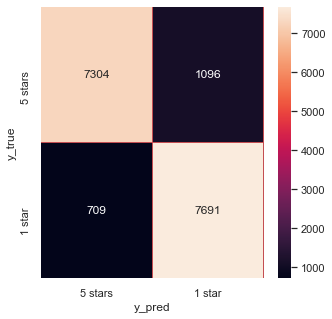

In [185]:
y_pred=nb.predict(xtest)
confusion(ytest,y_pred)

In [186]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix

rf = RandomForestClassifier(n_estimators = 50, random_state=42)
rf.fit(xtrain,ytrain)
print("acc: ",rf.score(xtest,ytest))

acc:  0.8842857142857142


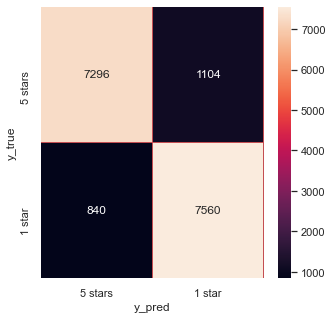

In [187]:
y_pred=rf.predict(xtest)
confusion(ytest,y_pred)

C:\Users\QA\anaconda3\envs\datascience\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


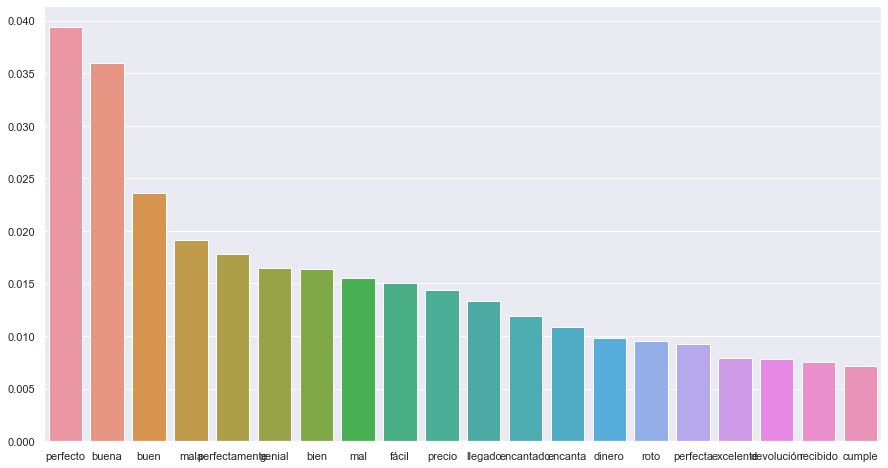

In [188]:
# Le preguntamos la importancia de cada feature (cada palabra)
importances = rf.feature_importances_
# Tomamos la lista de palabras
all_words = cou_vec.get_feature_names()
columns = all_words

# Ordenamos por importnacia y tomamos las 20 primeras
indices = np.argsort(importances)[::-1]
indices = indices[:20]
selected_columns = [columns[i] for i in indices]
selected_importances = importances[indices]

# Por ultimo graficamos
plt.figure(figsize = (15,8))
sns.barplot(selected_columns, selected_importances)
plt.show()

In [189]:
# Notar que en vez de utilizar SVC, vamos a usar LinearSVC. 
# Para el Kernel Lineal, esta función es MUCHO mas rapida que la tradicional SVC.
from sklearn.svm import LinearSVC

svc = LinearSVC(C = 1)
svc.fit(xtrain,ytrain)
svc.score(xtest,ytest)

C:\Users\QA\anaconda3\envs\datascience\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


0.9060119047619047

In [190]:
# Usaremos solo las 1000 palabras con mas frecuencia en todo el corpus para generar los vectores
max_features=1000

# Es decir que cada instancia tendrá 1000 features
cou_vec2=CountVectorizer(max_features=max_features,ngram_range=(2, 2)) # stop_words="english" , ngram_range=(1, 2)

In [192]:
matriz_reviews = cou_vec2.fit_transform(list_reviews)

# Tomamos las palabras
all_words = cou_vec2.get_feature_names()

# Vizualizamos las 50 palabras mas usadas
print("50 palabras mas usadas: ",all_words[0:50])

50 palabras mas usadas:  ['abrir caja', 'abrir paquete', 'acabo recibir', 'acero inoxidable', 'aconsejo compra', 'adapta bien', 'adapta perfectamente', 'adaptan bien', 'además ser', 'además viene', 'agradable tacto', 'agua caliente', 'aguanta bien', 'aguanta peso', 'ahora funciona', 'ahora mismo', 'ahora puedo', 'ajusta bien', 'ajusta perfectamente', 'ajustan bien', 'alguna vez', 'alta calidad', 'amazon debería', 'amazon prime', 'amazon siempre', 'aparece foto', 'apple watch', 'arriba abajo', 'así puedo', 'así recomiendo', 'atención cliente', 'aun asi', 'aun así', 'aun esperando', 'aun llegado', 'aun recibido', 'año medio', 'año uso', 'años encantado', 'aún así', 'aún esperando', 'aún llegado', 'aún recibido', 'aún sigo', 'baja calidad', 'barato sale', 'bastante bien', 'bastante buena', 'bastante bueno', 'bastante calidad']


In [193]:
x = matriz_reviews.toarray()
y = stars

from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x,y,test_size=0.2,random_state=42,stratify=y)

In [194]:
from sklearn.svm import LinearSVC

svc = LinearSVC(C = 1)
svc.fit(xtrain,ytrain)
svc.score(xtest,ytest)

0.7470833333333333

In [195]:
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()
nb.fit(xtrain,ytrain)
print("acc : ", nb.score(xtest,ytest))

acc :  0.7458928571428571


In [196]:
#probar con mas features

In [198]:
max_features=1000

# Es decir que cada instancia tendrá 1000 features
cou_vec3=CountVectorizer(max_features=max_features,ngram_range=(1, 2)) # stop_words="english" , ngram_range=(1, 2)

In [199]:
matriz_reviews = cou_vec3.fit_transform(list_reviews)

In [200]:
x = matriz_reviews.toarray()
y = stars

from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x,y,test_size=0.2,random_state=42,stratify=y)

In [201]:
from sklearn.svm import LinearSVC

svc = LinearSVC(C = 1)
svc.fit(xtrain,ytrain)
svc.score(xtest,ytest)

C:\Users\QA\anaconda3\envs\datascience\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


0.9051785714285714

In [202]:
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()
nb.fit(xtrain,ytrain)
print("acc : ", nb.score(xtest,ytest))

acc :  0.8925595238095239


In [203]:
list_reviews_sucio = list(datos['review_body'].values)
stars = datos['stars'].values

In [204]:
matriz_reviews_sucio = cou_vec.fit_transform(list_reviews_sucio)

In [208]:
x = matriz_reviews_sucio.toarray()
y = stars

from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x,y,test_size=0.2,random_state=42,stratify=y)

In [209]:
from sklearn.svm import LinearSVC

svc = LinearSVC(C = 1)
svc.fit(xtrain,ytrain)
svc.score(xtest,ytest)

C:\Users\QA\anaconda3\envs\datascience\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


0.9317261904761904

In [210]:
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()
nb.fit(xtrain,ytrain)
print("acc : ", nb.score(xtest,ytest))

acc :  0.9103571428571429


In [211]:
# el modelo da mejor con los datos sucios

In [166]:
from sklearn.feature_extraction.text import  TfidfTransformer

In [167]:
from sklearn.pipeline import Pipeline

In [168]:
pipeline = Pipeline([
    ('bow', CountVectorizer()),  
    ('tfidf', TfidfTransformer()),  
    ('classifier', MultinomialNB()),
])

In [169]:
X = datos['review_body']
y =datos['stars']
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.3,random_state=101)

In [170]:
pipeline.fit(X_train,y_train)

Pipeline(steps=[('bow', CountVectorizer()), ('tfidf', TfidfTransformer()),
                ('classifier', MultinomialNB())])

In [171]:
predictions = pipeline.predict(X_test)

In [172]:
print(confusion_matrix(y_test,predictions))
print(classification_report(y_test,predictions))

[[11623   969]
 [  939 11669]]
              precision    recall  f1-score   support

           1       0.93      0.92      0.92     12592
           5       0.92      0.93      0.92     12608

    accuracy                           0.92     25200
   macro avg       0.92      0.92      0.92     25200
weighted avg       0.92      0.92      0.92     25200

